In [1]:
import pandas as pd

import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

from matplotlib import pyplot as plt
import random


**Obtener el dataset de wikiart**

In [14]:
datos_estilo = pd.read_csv("wikiart_csv/style_class.txt", sep="\t", header=None) 
print(datos_estilo)

                                0
0        0 Abstract_Expressionism
1               1 Action_painting
2             2 Analytical_Cubism
3                   3 Art_Nouveau
4                       4 Baroque
5          5 Color_Field_Painting
6          6 Contemporary_Realism
7                        7 Cubism
8             8 Early_Renaissance
9                 9 Expressionism
10                     10 Fauvism
11            11 High_Renaissance
12               12 Impressionism
13  13 Mannerism_Late_Renaissance
14                  14 Minimalism
15       15 Naive_Art_Primitivism
16                 16 New_Realism
17        17 Northern_Renaissance
18                 18 Pointillism
19                     19 Pop_Art
20          20 Post_Impressionism
21                     21 Realism
22                      22 Rococo
23                 23 Romanticism
24                   24 Symbolism
25            25 Synthetic_Cubism
26                     26 Ukiyo_e


In [3]:
dato_estilo = pd.read_csv("wikiart_csv/style_train.csv") 
print(dato_estilo.shape)

(57024, 2)


In [4]:
dato_estilo_val = pd.read_csv("wikiart_csv/style_val.csv") 
print(dato_estilo_val.shape)

(24420, 2)


In [5]:
folder = 'wikiart/'
x_tr = folder + dato_estilo.iloc[:,0]
print(x_tr.shape)
y_tr = dato_estilo.iloc[:,1]
print(y_tr.shape)

(57024,)
(57024,)


In [6]:
x_ts = folder + dato_estilo_val.iloc[:,0]
print(x_ts.shape)
y_ts = dato_estilo_val.iloc[:,1]
print(y_ts.shape)

(24420,)
(24420,)


**Visualizar datos**

In [37]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array
import numpy as np

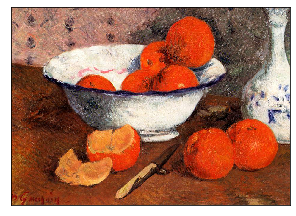

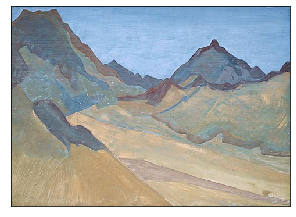

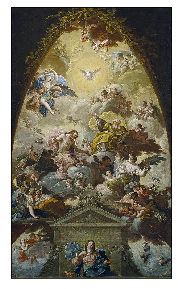

In [10]:
for i in range(3):
    plt.figure(figsize=(5,5))
    k =random.randint(0,57024)
    plt.subplot(111)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    archivo = x_tr[k] 
    imagen = load_img(archivo)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.show()   

**Modelo**

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [26]:
img_ancho, img_alto = 150, 150
batch_size = 16

generar_datos = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

entrenamiento = generar_datos.flow_from_directory(
    'wikiart/',
    classes=['Abstract_Expressionism', 'Action_painting', 'Analytical_Cubism', 'Art_Nouveau, Baroque', 
             'Color_Field_Painting', 'Contemporary_Realism', 'Cubism', 'Early_Renaissance', 'Expressionism', 
             'Fauvism', 'High_Renaissance','Impressionism', 'Mannerism_Late_Renaissance', 'Minimalism',
             'Naive_Art_Primitivism', 'New_Realism', 'Northern_Renaissance', 'Pointillism', 'Pop_Art', 
             'Post_Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Symbolism', 'Synthetic_Cubism', 'Ukiyo_e'],
    target_size=(img_ancho, img_alto),
    batch_size=batch_size,
    subset='training') 

validacion = generar_datos.flow_from_directory(
    'wikiart/', 
    classes=['Abstract_Expressionism', 'Action_painting', 'Analytical_Cubism', 'Art_Nouveau, Baroque', 
             'Color_Field_Painting', 'Contemporary_Realism', 'Cubism', 'Early_Renaissance', 'Expressionism', 
             'Fauvism', 'High_Renaissance','Impressionism', 'Mannerism_Late_Renaissance', 'Minimalism',
             'Naive_Art_Primitivism', 'New_Realism', 'Northern_Renaissance', 'Pointillism', 'Pop_Art', 
             'Post_Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Symbolism', 'Synthetic_Cubism', 'Ukiyo_e'],
    target_size=(img_ancho, img_alto),
    batch_size=batch_size,
    subset='validation') 

Found 58307 images belonging to 26 classes.
Found 14564 images belonging to 26 classes.


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

In [28]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(26))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 10)

Epoch 1/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.6585 - accuracy: 0.1885

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 5216s 1s/step - loss: 2.6586 - accuracy: 0.1885 - val_loss: 2.5377 - val_accuracy: 0.2099
Epoch 2/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.4405 - accuracy: 0.2389

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 5675s 2s/step - loss: 2.4404 - accuracy: 0.2390 - val_loss: 2.4195 - val_accuracy: 0.1995
Epoch 3/10
3643/3644 [============================>.] - ETA: 6s - loss: 2.3173 - accuracy: 0.2718 

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 25488s 7s/step - loss: 2.3174 - accuracy: 0.2718 - val_loss: 2.3077 - val_accuracy: 0.2485
Epoch 4/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.2626 - accuracy: 0.2838

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 5680s 2s/step - loss: 2.2626 - accuracy: 0.2838 - val_loss: 2.2999 - val_accuracy: 0.2486
Epoch 5/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.2165 - accuracy: 0.2958

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 4997s 1s/step - loss: 2.2166 - accuracy: 0.2958 - val_loss: 2.3060 - val_accuracy: 0.2649
Epoch 6/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.1899 - accuracy: 0.3021

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 5842s 2s/step - loss: 2.1900 - accuracy: 0.3021 - val_loss: 2.2271 - val_accuracy: 0.2790
Epoch 7/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.1767 - accuracy: 0.3059

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 5736s 2s/step - loss: 2.1766 - accuracy: 0.3059 - val_loss: 2.2478 - val_accuracy: 0.2739
Epoch 8/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.1601 - accuracy: 0.3110

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 5293s 1s/step - loss: 2.1601 - accuracy: 0.3110 - val_loss: 2.2294 - val_accuracy: 0.2679
Epoch 9/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.1474 - accuracy: 0.3149

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 4628s 1s/step - loss: 2.1473 - accuracy: 0.3149 - val_loss: 2.2313 - val_accuracy: 0.2748
Epoch 10/10
3643/3644 [============================>.] - ETA: 1s - loss: 2.1402 - accuracy: 0.3165

/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (107327830 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/Users/fernanda/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99962094 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


3644/3644 [==============================] - 5293s 1s/step - loss: 2.1402 - accuracy: 0.3165 - val_loss: 2.2423 - val_accuracy: 0.2791


In [34]:
prueba_1 = image.load_img('starry_night_full.jpg', target_size=(150,150))
prueba_1 = image.img_to_array(prueba_1)
prueba_1 = np.expand_dims(prueba_1,axis=0)
resultado_1 = model.predict(prueba_1)
print(resultado_1) 

[[6.2431040e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.4422653e-38
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]


In [40]:
prueba_2 = image.load_img('Unknown-10.png', target_size=(150,150))
prueba_2 = image.img_to_array(prueba_2)
prueba_2 = np.expand_dims(prueba_2,axis=0)
resultado_2 = model.predict(prueba_2)
print(resultado_2) 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0.]]


Ahora se intentará modificar el dataset a unicamente 12 clases

In [42]:
img_ancho, img_alto = 150, 150
batch_size = 16

generar_datos_2 = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

entrenamiento_2 = generar_datos_2.flow_from_directory(
    'wikiart/',
    classes=['Abstract_Expressionism', 'Art_Nouveau_Modern', 'Baroque', 'Cubism', 'Early_Renaissance', 'Expressionism', 
             'Fauvism', 'Minimalism', 'New_Realism', 'Pop_Art', 'Post_Impressionism', 'Rococo' ],
    target_size=(img_ancho, img_alto),
    batch_size=batch_size,
    subset='training') 

validacion_2 = generar_datos_2.flow_from_directory(
    'wikiart/', 
    classes=['Abstract_Expressionism', 'Art_Nouveau_Modern', 'Baroque', 'Cubism', 'Early_Renaissance', 'Expressionism', 
             'Fauvism', 'Minimalism', 'New_Realism', 'Pop_Art', 'Post_Impressionism', 'Rococo' ],
    target_size=(img_ancho, img_alto),
    batch_size=batch_size,
    subset='validation') 

Found 27467 images belonging to 12 classes.
Found 6860 images belonging to 12 classes.


In [43]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_ancho, img_alto)
else:
    input_shape = (img_ancho, img_alto, 3)

model_2 = Sequential()
model_2.add(Conv2D(64, (6, 6), input_shape=input_shape))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (4, 4)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (4, 4)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (4, 4)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(12))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_ancho, img_alto)
else:
    input_shape = (img_ancho, img_alto, 3)

model_2 = Sequential()
model_2.add(Conv2D(64, (3, 3), input_shape=input_shape))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (2, 2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (2, 2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(32, (2, 2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(32))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(12))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [46]:
model_2.fit_generator(
    entrenamiento_2,
    steps_per_epoch = entrenamiento_2.samples // batch_size,
    validation_data = validacion_2, 
    validation_steps = validacion_2.samples // batch_size,
    epochs = 10)

Epoch 1/10
1716/1716 [==============================] - 3825s 2s/step - loss: 2.1513 - accuracy: 0.2451 - val_loss: 2.0223 - val_accuracy: 0.2909
Epoch 2/10
1716/1716 [==============================] - 3896s 2s/step - loss: 2.0131 - accuracy: 0.2770 - val_loss: 1.9607 - val_accuracy: 0.2926
Epoch 3/10
1716/1716 [==============================] - 4015s 2s/step - loss: 1.9474 - accuracy: 0.2986 - val_loss: 1.8518 - val_accuracy: 0.3143
Epoch 4/10
1716/1716 [==============================] - 4035s 2s/step - loss: 1.8858 - accuracy: 0.3247 - val_loss: 1.8160 - val_accuracy: 0.3364
Epoch 5/10
1716/1716 [==============================] - 4544s 3s/step - loss: 1.8535 - accuracy: 0.3269 - val_loss: 1.7888 - val_accuracy: 0.3478
Epoch 6/10
1716/1716 [==============================] - 4969s 3s/step - loss: 1.8183 - accuracy: 0.3387 - val_loss: 1.7803 - val_accuracy: 0.3538
Epoch 7/10
1716/1716 [==============================] - 4707s 3s/step - loss: 1.8034 - accuracy: 0.3455 - val_loss: 1.7356 -

In [54]:
#Expresionista
prueba_1 = image.load_img('wikiart/Expressionism/amadeo-de-souza-cardoso_green-eye-mask-1915.jpg', target_size=(150,150))
prueba_1 = image.img_to_array(prueba_1)
prueba_1 = np.expand_dims(prueba_1,axis=0)
resultado_1 = model_2.predict(prueba_1)
print(resultado_1) 
#Barroco
prueba_2 = image.load_img('wikiart/Baroque/bernardo-strozzi_st-francis-of-assisi.jpg', target_size=(150,150))
prueba_2 = image.img_to_array(prueba_2)
prueba_2 = np.expand_dims(prueba_2,axis=0)
resultado_2 = model_2.predict(prueba_2)
print(resultado_2) 
#Mezcla
prueba_3 = image.load_img('final_1.png', target_size=(150,150))
prueba_3 = image.img_to_array(prueba_3)
prueba_3 = np.expand_dims(prueba_3,axis=0)
resultado_3 = model_2.predict(prueba_3)
print(resultado_3) 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0.0000000e+00 2.9409140e-01 0.0000000e+00 3.1030132e-25 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.0590866e-01
  0.0000000e+00 0.0000000e+00]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [56]:
#Rococo
prueba_4 = image.load_img('wikiart/Rococo/pietro-longhi_the-duck-hunt.jpg', target_size=(150,150))
prueba_4 = image.img_to_array(prueba_4)
prueba_4 = np.expand_dims(prueba_4,axis=0)
resultado_4 = model_2.predict(prueba_4)
print(resultado_4) 
#Cubismo
prueba_5 = image.load_img('wikiart/Cubism/alfred-manessier_les-dieux-marins-1935.jpg', target_size=(150,150))
prueba_5 = image.img_to_array(prueba_5)
prueba_5 = np.expand_dims(prueba_5,axis=0)
resultado_5 = model_2.predict(prueba_5)
print(resultado_5) 
#Mezcla
prueba_6 = image.load_img('final_2.png', target_size=(150,150))
prueba_6 = image.img_to_array(prueba_6)
prueba_6 = np.expand_dims(prueba_6,axis=0)
resultado_6 = model_2.predict(prueba_6)
print(resultado_6) 

[[0.0000000e+00 5.3577972e-26 0.0000000e+00 1.9179566e-23 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[[8.9631254e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [57]:
#Art Nouveau
prueba_7 = image.load_img('wikiart/Art_Nouveau_Modern/carl-larsson_august-strindberg-1899(1).jpg', target_size=(150,150))
prueba_7 = image.img_to_array(prueba_7)
prueba_7 = np.expand_dims(prueba_7,axis=0)
resultado_7 = model_2.predict(prueba_7)
print(resultado_7) 
#Expresionismo abstracto
prueba_8 = image.load_img('wikiart/Abstract_Expressionism/conrad-marca-relli_autumn-suite-c-1970.jpg', target_size=(150,150))
prueba_8 = image.img_to_array(prueba_8)
prueba_8 = np.expand_dims(prueba_8,axis=0)
resultado_8 = model_2.predict(prueba_8)
print(resultado_8) 
#Mezcla
prueba_9 = image.load_img('final_3.png', target_size=(150,150))
prueba_9 = image.img_to_array(prueba_9)
prueba_9 = np.expand_dims(prueba_9,axis=0)
resultado_9 = model_2.predict(prueba_9)
print(resultado_9) 

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.9300168e-31 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[[3.6472608e-26 9.9937314e-01 0.0000000e+00 1.2889159e-08 0.0000000e+00
  1.2613661e-15 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.2685012e-04
  0.0000000e+00 0.0000000e+00]]


In [58]:
#Pop Art
prueba_10 = image.load_img('wikiart/Pop_Art/andy-warhol_bighorn-ram-endangered-species-1983.jpg', target_size=(150,150))
prueba_10 = image.img_to_array(prueba_10)
prueba_10 = np.expand_dims(prueba_10,axis=0)
resultado_10 = model_2.predict(prueba_10)
print(resultado_10) 
#Minimalismo
prueba_11 = image.load_img('wikiart/Minimalism/frank-stella_black-adder-v-series-1968.jpg', target_size=(150,150))
prueba_11 = image.img_to_array(prueba_11)
prueba_11 = np.expand_dims(prueba_11,axis=0)
resultado_11 = model_2.predict(prueba_11)
print(resultado_11) 
#Mezcla
prueba_12 = image.load_img('final_5.png', target_size=(150,150))
prueba_12 = image.img_to_array(prueba_12)
prueba_12 = np.expand_dims(prueba_12,axis=0)
resultado_12 = model_2.predict(prueba_12)
print(resultado_12) 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5289061e-16
  0.0000000e+00 0.0000000e+00]]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.2627661e-27 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [59]:
#Renacentismo Temprano
prueba_13 = image.load_img('wikiart/Early_Renaissance/andrea-del-castagno_equestrian-monument-to-niccolo-da-tolentino-1456.jpg', target_size=(150,150))
prueba_13 = image.img_to_array(prueba_13)
prueba_13 = np.expand_dims(prueba_13,axis=0)
resultado_13 = model_2.predict(prueba_13)
print(resultado_13) 
#Fauvismo
prueba_14 = image.load_img('wikiart/Fauvism/charles-lapicque_oedipe-1964.jpg', target_size=(150,150))
prueba_14 = image.img_to_array(prueba_14)
prueba_14 = np.expand_dims(prueba_14,axis=0)
resultado_14 = model_2.predict(prueba_14)
print(resultado_14) 
#Mezcla
prueba_15 = image.load_img('final_4.png', target_size=(150,150))
prueba_15 = image.img_to_array(prueba_15)
prueba_15 = np.expand_dims(prueba_15,axis=0)
resultado_15 = model_2.predict(prueba_15)
print(resultado_15) 

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [60]:
#Post Impresionismo
prueba_16 = image.load_img('wikiart/Post_Impressionism/nicolae-darascu_chioggia.jpg', target_size=(150,150))
prueba_16 = image.img_to_array(prueba_16)
prueba_16 = np.expand_dims(prueba_16,axis=0)
resultado_16 = model_2.predict(prueba_16)
print(resultado_16) 
#Nuevo Realismo
prueba_17 = image.load_img('wikiart/New_Realism/edward-hopper_cape-cod-evening.jpg', target_size=(150,150))
prueba_17 = image.img_to_array(prueba_17)
prueba_17 = np.expand_dims(prueba_17,axis=0)
resultado_17 = model_2.predict(prueba_17)
print(resultado_17) 
#Mezcla
prueba_18 = image.load_img('final_6.png', target_size=(150,150))
prueba_18 = image.img_to_array(prueba_18)
prueba_18 = np.expand_dims(prueba_18,axis=0)
resultado_18 = model_2.predict(prueba_18)
print(resultado_18) 

[[3.864600e-34 0.000000e+00 0.000000e+00 3.548726e-33 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 0.000000e+00]]
[[1.5736433e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.5464667e-31 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]
[[1.7724960e-28 0.0000000e+00 0.0000000e+00 5.6520496e-21 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00]]
